<a href="https://colab.research.google.com/github/nikesandberg/Deep-Learning/blob/main/Kunskapskontroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Kaggle to be able to use the API for the dataset
!pip install -q kaggle

In [4]:
#Uploading the downloaded kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikesandberg","key":"f5b671ad432e952fbecf8d968bea4a0c"}'}

In [5]:
#Making a directory kalled /.kaggle because to use the kaggle it needs to be in this directory
!mkdir -p ~/.kaggle

In [6]:
#Changing position of the downloaded kaggle to the newly created directory
!cp kaggle.json ~/.kaggle/

In [7]:
#Changing the permission of the kaggle file
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!ls -la ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 May 31 09:33 .
drwx------ 1 root root 4096 May 31 09:33 ..
-rw------- 1 root root   68 May 31 09:33 kaggle.json


In [9]:
#Downloading the dataset used to train the model
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset


Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 80% 96.0M/121M [00:00<00:00, 265MB/s]
100% 121M/121M [00:00<00:00, 254MB/s] 


In [10]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('face-expression-recognition-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('face-expression-recognition-dataset')

# List the files to verify everything is correct
!ls face-expression-recognition-dataset


images


In [11]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os



from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,InputLayer,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


## Exploring the data

In [12]:
#Setting picture size to 48 since I want to display images at 48 by 48 pixels and saving the folder path to be used later
picture_size = 48
folder_path = "/content/face-expression-recognition-dataset/images/"

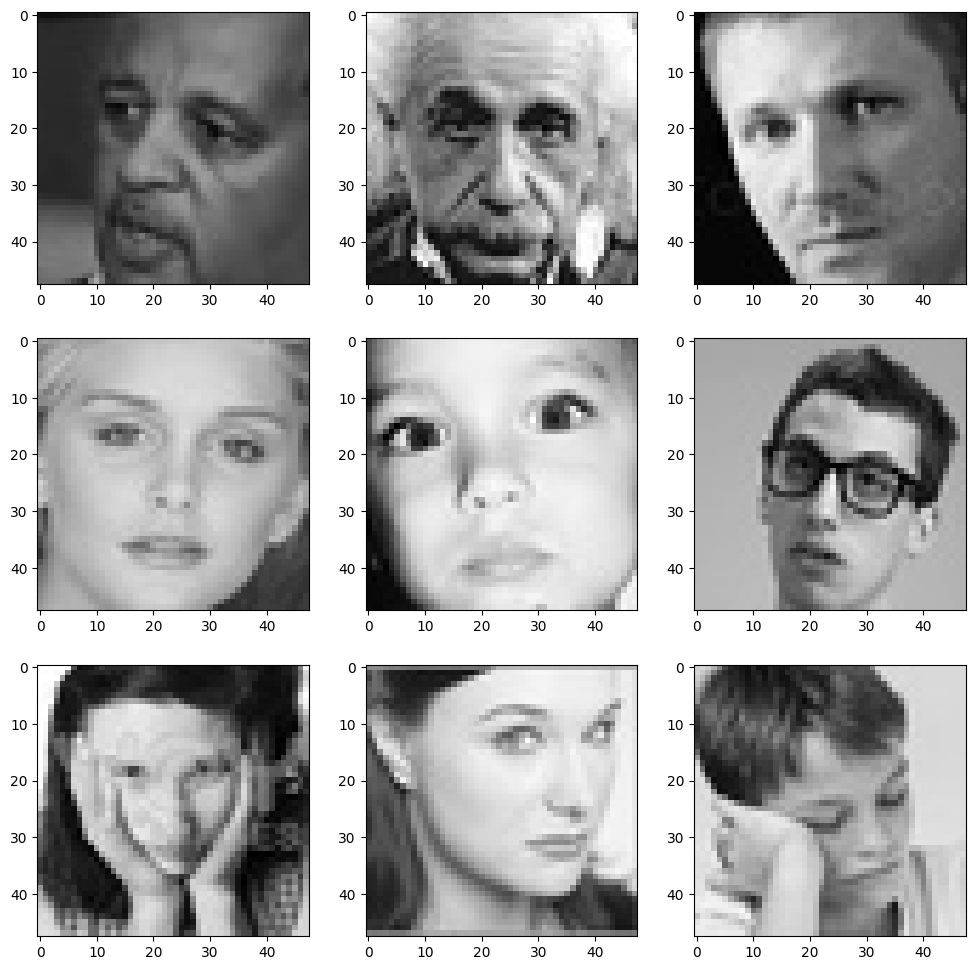

In [13]:
#Displaying 9 images of chosen expression to view and examine the data set
expression = 'neutral'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

## Preparing train and test set

In [16]:
#Defining the batch size that will be used during training and the train respectively test set
batch_size  = 128

datagen_train  = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Creating the model

In [17]:
# Define the number of classes
no_of_classes = 7

# Initialize the Sequential model
model = Sequential()

# Input layer
model.add(InputLayer(input_shape=(48, 48, 1)))

# 1st CNN layer
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 2nd CNN layer
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th CNN layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th CNN layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th CNN layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 7th CNN layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 8th CNN layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# 1st Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# 2nd Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer
model.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_10 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_11 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                    

## Training and evaluating the model

In [18]:
# Callbacks for learning rate reduction when validation loss plateaus, early stopping when validation loss stops imporving and model checkpoint to save the best model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('./model_best.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Setting the training set
train_generator = datagen.flow_from_directory(
    'face-expression-recognition-dataset/images/train',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical'
)

#Setting the validation set
validation_generator = datagen.flow_from_directory(
    'face-expression-recognition-dataset/images/validation',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=128,
    class_mode='categorical'
)

# Training the model for 50 epochs using the set callbacks
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/50
226/226 [==============================] - ETA: 0s - loss: 2.0668 - accuracy: 0.2182
Epoch 1: val_loss improved from inf to 1.78391, saving model to ./model_11.h5
226/226 [==============================] - 42s 128ms/step - loss: 2.0668 - accuracy: 0.2182 - val_loss: 1.7839 - val_accuracy: 0.2721 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


226/226 [==============================] - ETA: 0s - loss: 1.7756 - accuracy: 0.3087
Epoch 2: val_loss improved from 1.78391 to 1.68724, saving model to ./model_11.h5
226/226 [==============================] - 28s 125ms/step - loss: 1.7756 - accuracy: 0.3087 - val_loss: 1.6872 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 3/50
226/226 [==============================] - ETA: 0s - loss: 1.5835 - accuracy: 0.3887
Epoch 3: val_loss improved from 1.68724 to 1.50444, saving model to ./model_11.h5
226/226 [==============================] - 27s 121ms/step - loss: 1.5835 - accuracy: 0.3887 - val_loss: 1.5044 - val_accuracy: 0.4249 - lr: 0.0010
Epoch 4/50
226/226 [==============================] - ETA: 0s - loss: 1.4344 - accuracy: 0.4499
Epoch 4: val_loss improved from 1.50444 to 1.33887, saving model to ./model_11.h5
226/226 [==============================] - 28s 124ms/step - loss: 1.4344 - accuracy: 0.4499 - val_loss: 1.3389 - val_accuracy: 0.4874 - lr: 0.0010
Epoch 5/50
226/226 [================

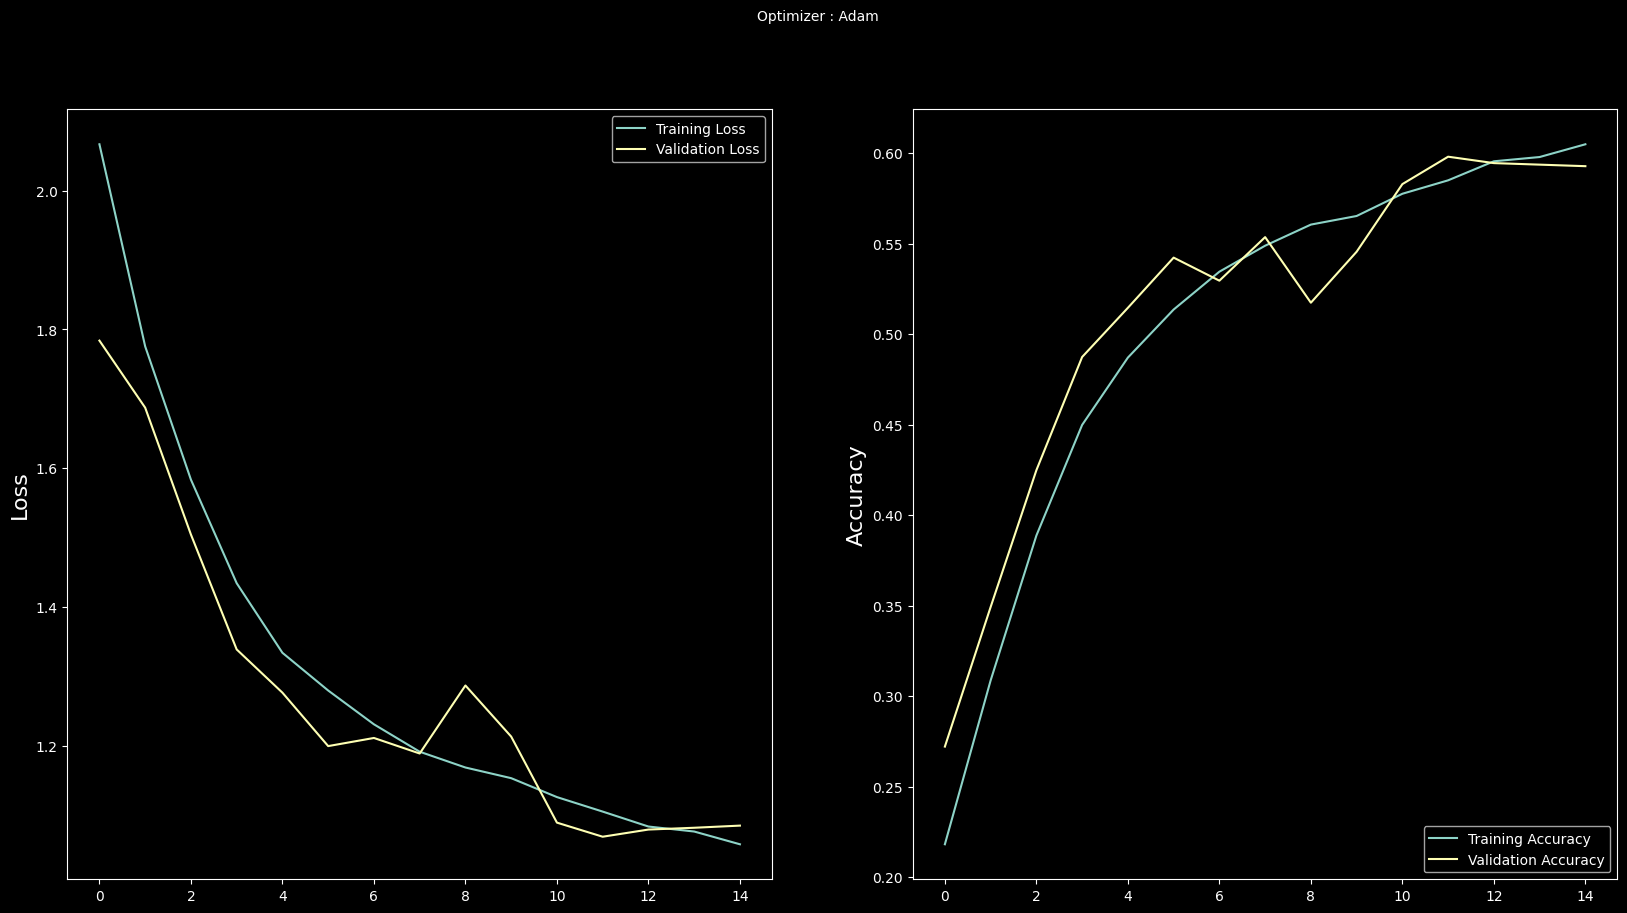

In [19]:
#Line chart of the training and validation loss and accuracy of the training and validation set

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [20]:
from google.colab import files

# Downloading the model saved using ModelCheckpoint
files.download('./model_best.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>